In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)
 #Hiperparametre için çağırıldı

from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


#**VERİ GÖRSELLEŞTİRME**

In [ ]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/BoranOner/Predicting-Diabetes/main/diabetes.csv" ,encoding = 'unicode_escape')
print(dataFrame)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [ ]:
df1 = dataFrame.copy()
df2 = dataFrame.copy()
df3 = dataFrame.copy()

In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


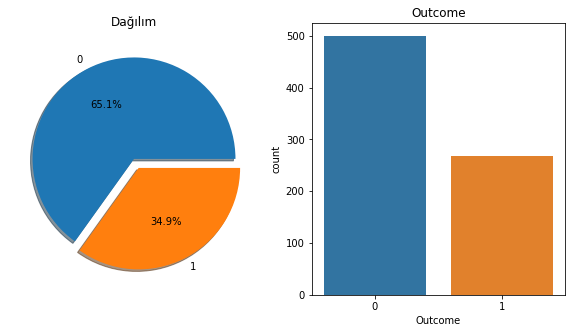

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
df1.isnull().sum()  # null değer gözükmüyor 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

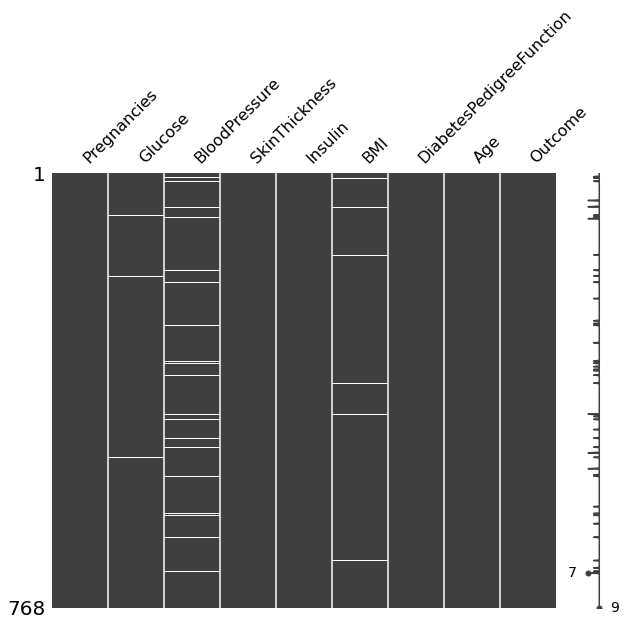

In [ ]:
msno.matrix(df1,figsize=(10,8))
plt.show()

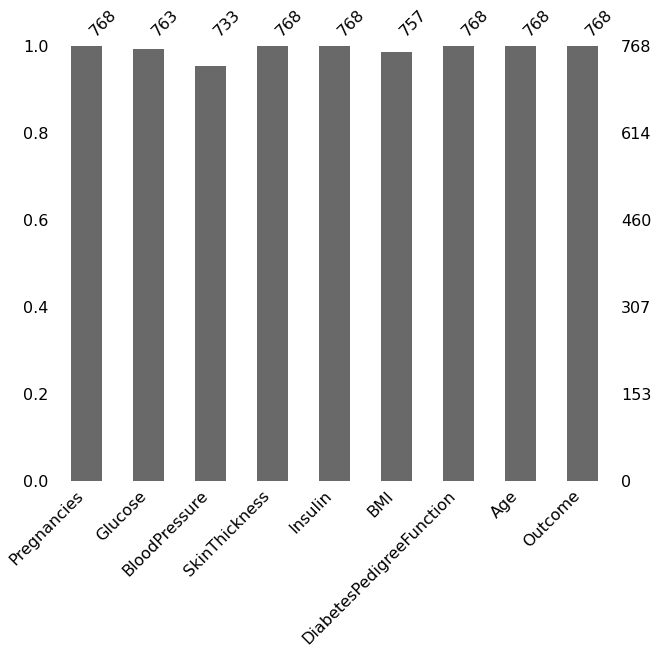

In [ ]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [ ]:
df1.dropna(inplace = True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.6 KB


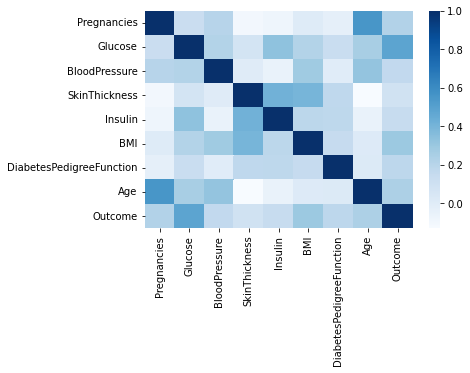

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(),cmap='Blues',annot=False)

#***Standartlaştırma*** 

In [ ]:
from sklearn.preprocessing import RobustScaler



rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1['Insulin'] = rob_scaler.fit_transform(df1['Insulin'].values.reshape(-1,1))
df1['SkinThickness'] = rob_scaler.fit_transform(df1['SkinThickness'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.333333,-0.367816,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,0.151515,-0.367816,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-0.727273,-0.367816,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.030303,0.352490,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,0.333333,0.919540,1.175824,4.990850,0.235294,1


In [ ]:
# veri setini train ve test olarak ayırıyoruz

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [ ]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)



---

*Dengeli Veri Seti*

---



In [ ]:
y_smote.value_counts()    


1    377
0    377
Name: Outcome, dtype: int64



---


#**GAUSSIAN NB**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
gaussianNB = GaussianNB()
gaussianNB = gaussianNB.fit(X_smote, y_smote)

train_pred_gaussianNB = gaussianNB.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_smote, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))

Train Accuracy : 75.332% 
Confusion Matrix-GaussianNB-Train: 
[[304  73]
 [113 264]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       377
           1       0.78      0.70      0.74       377

    accuracy                           0.75       754
   macro avg       0.76      0.75      0.75       754
weighted avg       0.76      0.75      0.75       754

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-GaussianNB-Test: 
[[78 20]
 [18 29]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        98
           1       0.59      0.62      0.60        47

    accuracy                           0.74       145
   macro avg       0.70      0.71      0.70       145
weighted avg       0.74      0.74      0.74       145



0.7064698219713418

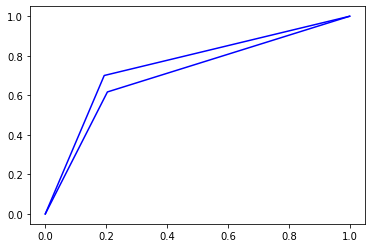

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote , train_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
GaussianNB Hiperparametre ile

---




In [ ]:
nb_classifier = GaussianNB()

params_NB =  {'var_smoothing': [0.1873817422860384]}   #0-1 aralğı test ediliyor 
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB,verbose=1,cv=5, scoring='accuracy') 
 
#Train Sınıflandırma raporunu yazdırmak
gs_NB.fit(X_smote,y_smote) 
gs_NB_pre_train = gs_NB.predict(X_smote)
print(classification_report(y_smote , gs_NB_pre_train))
print("Training Skoru:",accuracy_score(y_smote , gs_NB_pre_train))

#Test Sınıflandırma raporunu yazdırmak
gs_NB.fit(X_test,y_test) 
gs_NB_pre_test = gs_NB.predict(X_test)
print(classification_report(y_test , gs_NB_pre_test))
print("Test Skoru:",accuracy_score(y_test , gs_NB_pre_test))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       377
           1       0.78      0.66      0.72       377

    accuracy                           0.74       754
   macro avg       0.74      0.74      0.74       754
weighted avg       0.74      0.74      0.74       754

Training Skoru: 0.7374005305039788
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.66      0.53      0.59        47

    accuracy                           0.76       145
   macro avg       0.73      0.70      0.71       145
weighted avg       0.75      0.76      0.75       145

Test Skoru: 0.7586206896551724


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f53cbb50> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f534ae10>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


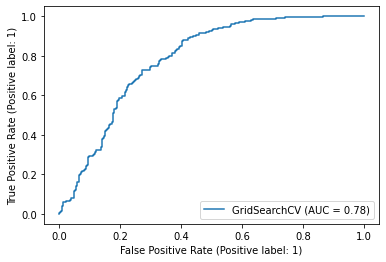

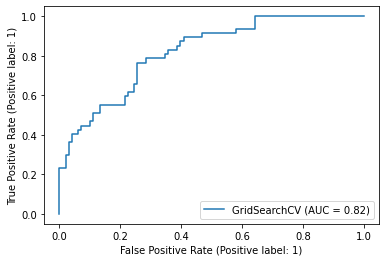

In [ ]:
print(plot_roc_curve(gs_NB, X_smote, y_smote),plot_roc_curve(gs_NB, X_test, y_test))



---



#**BERNOULLI NB**



---



In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_smote, y_smote)

train_pred_bernoulliNB = bernoulliNB.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_smote, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))





Train Accuracy : 69.894% 
Confusion Matrix-BernoulliNB-Train: 
[[251 126]
 [101 276]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       377
           1       0.69      0.73      0.71       377

    accuracy                           0.70       754
   macro avg       0.70      0.70      0.70       754
weighted avg       0.70      0.70      0.70       754

----------------------------------------
Test Accuracy  : 69.655% 
Confusion Matrix-BernoulliNB-Test: 
[[66 32]
 [12 35]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.85      0.67      0.75        98
           1       0.52      0.74      0.61        47

    accuracy                           0.70       145
   macro avg       0.68      0.71      0.68       145
weighted avg       0.74      0.70      0.71       145



0.709075119409466

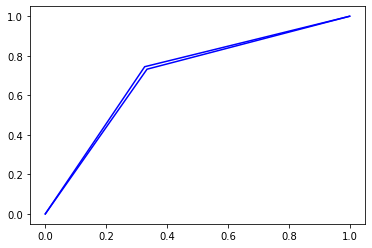

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc




---
BernoulliNB Hiperparametre İle

---




In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Hiperparametreler ile Training skoru buluyoruz

parameters_be = {"alpha":[0.1]}    #np.linspace(0.1,1,10) denendi en iyi alpha değer 0.1 bulundu

clf_be = GridSearchCV(BernoulliNB(), parameters_be,cv=5)

#Train Sınıflandırma raporunu yazdırmak
clf_be.fit(X_smote,y_smote) 
clf_pre_train = clf_be.predict(X_smote)
print(classification_report(y_smote , clf_pre_train))
print("Training Skoru:",accuracy_score(y_smote , clf_pre_train))

#Test Sınıflandırma raporunu yazdırmak
clf_be.fit(X_test,y_test) 
clf_pre_test = clf_be.predict(X_test)
print(classification_report(y_test , clf_pre_test))
print("Test Skoru:",accuracy_score(y_test , clf_pre_test))



              precision    recall  f1-score   support

           0       0.71      0.67      0.69       377
           1       0.69      0.73      0.71       377

    accuracy                           0.70       754
   macro avg       0.70      0.70      0.70       754
weighted avg       0.70      0.70      0.70       754

Training Skoru: 0.6989389920424404
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.58      0.53      0.56        47

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.68       145
weighted avg       0.72      0.72      0.72       145

Test Skoru: 0.7241379310344828


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f52ecc90> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f53e5ad0>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


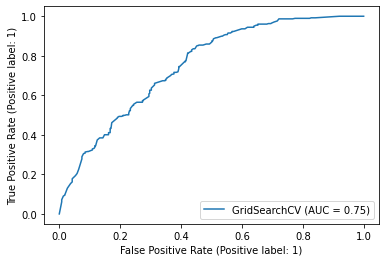

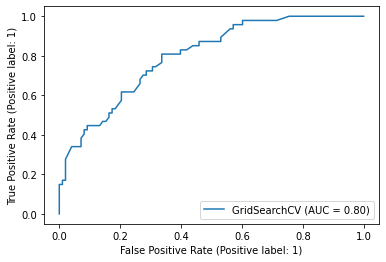

In [ ]:
print(plot_roc_curve(clf_be, X_smote, y_smote),plot_roc_curve(clf_be, X_test, y_test)) 



---



#**LogisticRegression**



---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_smote, y_smote)


train_pred_logisticRegression = logisticRegression.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_smote, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))

Train Accuracy : 77.056% 
Confusion Matrix-LogisticRegression-Train: 
[[299  78]
 [ 95 282]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       377
           1       0.78      0.75      0.77       377

    accuracy                           0.77       754
   macro avg       0.77      0.77      0.77       754
weighted avg       0.77      0.77      0.77       754

----------------------------------------
Test Accuracy  : 72.414% 
Confusion Matrix-LogisticRegression-Test: 
[[73 25]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        98
           1       0.56      0.68      0.62        47

    accuracy                           0.72       145
   macro avg       0.70      0.71      0.70       145
weighted avg       0.74      0.72      0.73       145



0.7128745115067304

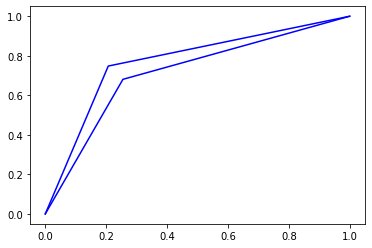

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Logistic Regression Hiperparametreler İle

---




In [ ]:
param ={"C": [1e+20],  # C : np.logspace(20,40,60)
        "penalty":['l2']}  # l2 ve none

cv_ls = GridSearchCV(LogisticRegression(), param, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_train,y_train)


#Train Sınıflandırma raporunu yazdırmak
cv_ls.fit(X_smote,y_smote) 
cv_pre_train = cv_ls.predict(X_smote)
print(classification_report(y_smote , cv_pre_train))
print("Training Skoru:",accuracy_score(y_smote , cv_pre_train))

#Test Sınıflandırma raporunu yazdırmak 
cv_ls.fit(X_test,y_test)
cv_pre_test = cv_ls.predict(X_test)
print(classification_report(y_test , cv_pre_test))
print("Test Skoru:",accuracy_score(y_test , cv_pre_test))



              precision    recall  f1-score   support

           0       0.76      0.79      0.78       377
           1       0.78      0.75      0.77       377

    accuracy                           0.77       754
   macro avg       0.77      0.77      0.77       754
weighted avg       0.77      0.77      0.77       754

Training Skoru: 0.773209549071618
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.68      0.53      0.60        47

    accuracy                           0.77       145
   macro avg       0.74      0.70      0.72       145
weighted avg       0.76      0.77      0.76       145

Test Skoru: 0.7655172413793103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01ff107110> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01fec449d0>


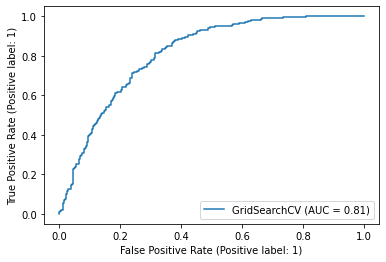

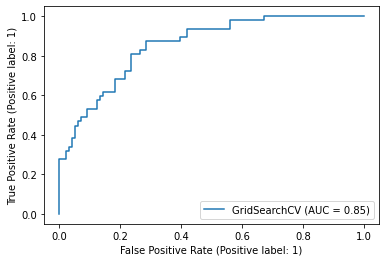

In [ ]:
print(plot_roc_curve(cv_ls, X_smote, y_smote),plot_roc_curve(cv_ls, X_test, y_test))



---



#**DECISION TREE**



---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_smote, y_smote)

train_pred_decision_tree = decision_tree.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_smote, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))

Train Accuracy : 100.000% 
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 377]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       377

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

----------------------------------------
Test Accuracy  : 77.931% 
Confusion Matrix-DecisionTreeClassifier-Test: 
[[77 21]
 [11 36]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        98
           1       0.63      0.77      0.69        47

    accuracy                           0.78       145
   macro avg       0.75      0.78      0.76       145
weighted avg       0.80      0.78      0.78       145



0.7758358662613982

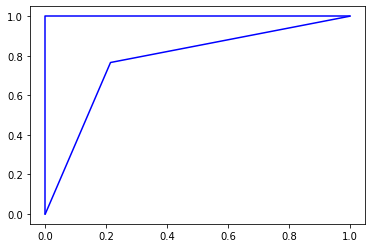

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

---
Decision Tree Hiperparametreler İle

---




In [ ]:
param_dict= {"criterion":['gini'],   #gini ve entropy denendi
             "max_depth"          : [6], #1-8 aralığında denendi
             "min_samples_split"  : [1.0], #1-10 aralığında denendi
             "min_samples_leaf"   : [2], #1-5 aralığında denendi
            }

detr=DecisionTreeClassifier()
detr_cv = GridSearchCV (detr,param_dict, verbose=0)
detr_cv.fit(X_smote,y_smote) 

#Train Sınıflandırma raporunu yazdırmak


detr_cv_pre_train = detr_cv.predict(X_smote)
print(classification_report(y_smote , detr_cv_pre_train))
print("Training Skoru:",accuracy_score(y_smote , detr_cv_pre_train))

#Test Sınıflandırma raporunu yazdırmak
detr_cv.fit(X_test,y_test)
detr_cv_pre_test = detr_cv.predict(X_test)
print(classification_report(y_test , detr_cv_pre_test))
print("Test Skoru:",accuracy_score(y_test , detr_cv_pre_test))



              precision    recall  f1-score   support

           0       0.78      0.62      0.69       377
           1       0.69      0.82      0.75       377

    accuracy                           0.72       754
   macro avg       0.73      0.72      0.72       754
weighted avg       0.73      0.72      0.72       754

Training Skoru: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        98
           1       0.58      0.70      0.63        47

    accuracy                           0.74       145
   macro avg       0.71      0.73      0.72       145
weighted avg       0.76      0.74      0.74       145

Test Skoru: 0.7379310344827587


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01fec3fdd0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f5271bd0>


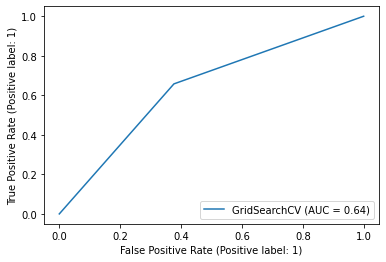

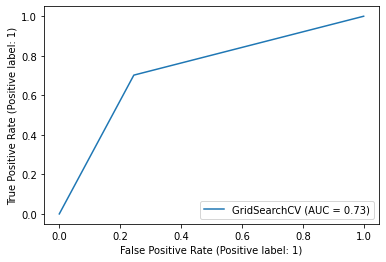

In [ ]:
print(plot_roc_curve(detr_cv, X_smote, y_smote),plot_roc_curve(detr_cv, X_test, y_test))



---



#**SVM (SUPPORT VECTOR MACHINE)**



---



In [ ]:
from sklearn import svm
from sklearn.svm import SVC

sv = svm.SVC()  
sv.fit(X_smote , y_smote)

train_pred_svm =  sv.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_svm)*100))

print("Confusion Matrix-SVM TRAIN: ")
print(confusion_matrix(y_smote, train_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_svm))

print("-"*40)

test_pred_svm = sv.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_svm)*100))

print("Confusion Matrix-SVM TEST: ")
print(confusion_matrix(y_test, test_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_svm))




Train Accuracy : 84.483% 
Confusion Matrix-SVM TRAIN: 
[[305  72]
 [ 45 332]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       377
           1       0.82      0.88      0.85       377

    accuracy                           0.84       754
   macro avg       0.85      0.84      0.84       754
weighted avg       0.85      0.84      0.84       754

----------------------------------------
Test Accuracy  : 70.345% 
Confusion Matrix-SVM TEST: 
[[68 30]
 [13 34]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        98
           1       0.53      0.72      0.61        47

    accuracy                           0.70       145
   macro avg       0.69      0.71      0.69       145
weighted avg       0.74      0.70      0.71       145



0.7086409031697785

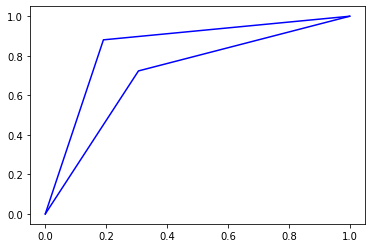

In [ ]:
("ROC_AUC TRAINING")
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc
("ROC_AUC TESTING")
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
SVM Hiperparametre İle


---




In [ ]:
#Parametrenin Sınırlarını Belirtme

param_grid = {'C': [4], # C=(0.1, 1, 10, 100, 1000) aralığında denendi
              'gamma': [ 1], # C=(0.0001 , 0.01 , 0.1 , 1) aralığında denendi
              'kernel': ['rbf'], # "rbf", "linear" ve "sigmoid" denendi.
              'class_weight' : ['balanced']}  # "none" , "balanced" ve "dict" denendi.
model=SVC()
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)



#Train Sınıflandırma raporunu yazdırmak
grid_svm.fit(X_smote,y_smote) 
grid_svm_pre_train = grid_svm.predict(X_smote)
print(classification_report(y_smote , grid_svm_pre_train))
print("Training Skoru:",accuracy_score(y_smote , grid_svm_pre_train))

print(grid_svm.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       377
           1       0.99      0.99      0.99       377

    accuracy                           0.99       754
   macro avg       0.99      0.99      0.99       754
weighted avg       0.99      0.99      0.99       754

Training Skoru: 0.986737400530504
{'C': 4, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#Test Sınıflandırma raporunu yazdırmak
grid_svm.fit(X_test,y_test)
grid_svm_pre_test = grid_svm.predict(X_test)
print(classification_report(y_test , grid_svm_pre_test))
print("Test Skoru:",accuracy_score(y_test , grid_svm_pre_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        47

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Test Skoru: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



AUC Grafik
 <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f511cd90> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f50d8850>


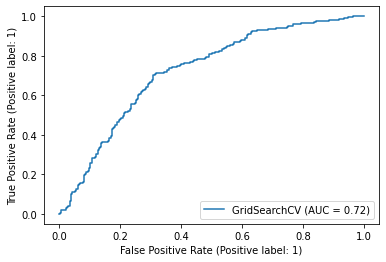

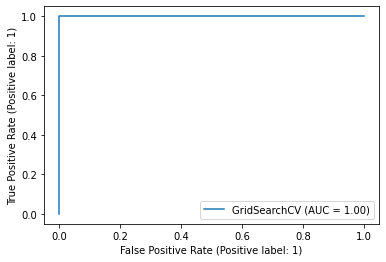

In [ ]:
#Üst tarafta Training AUC - Alt tarafta Test AUC GRAFİKLERİ
print("\nAUC Grafik\n",plot_roc_curve(grid_svm, X_smote , y_smote) ,plot_roc_curve(grid_svm, X_test , y_test), )



---



#**KNN (K-NEAREST NEIGHBORS)**



---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_smote , y_smote)

train_pred_knn =  knn.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_knn)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_smote, train_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_knn))

print("-"*40)

test_pred_knn = knn.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_knn)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_knn))

Train Accuracy : 83.952% 
Confusion Matrix-KNN TRAIN: 
[[291  86]
 [ 35 342]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       377
           1       0.80      0.91      0.85       377

    accuracy                           0.84       754
   macro avg       0.85      0.84      0.84       754
weighted avg       0.85      0.84      0.84       754

----------------------------------------
Test Accuracy  : 69.655% 
Confusion Matrix-KNN TEST: 
[[70 28]
 [16 31]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        98
           1       0.53      0.66      0.58        47

    accuracy                           0.70       145
   macro avg       0.67      0.69      0.67       145
weighted avg       0.72      0.70      0.70       145



0.6869300911854104

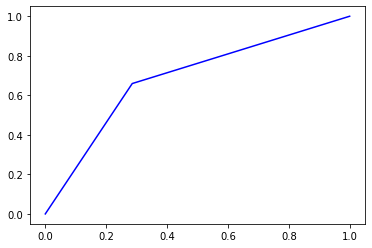

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



*KNN modeli için hiperparametreleri bulma*

---



In [ ]:
param_grid = {
              'n_neighbors': [19],  #3, 5, 11, 19 denendi
              'weights': ['uniform'], #uniform ve distance denendi
              'metric': ['manhattan'] # euclideans ve manhattan denendi
              }
model = KNeighborsClassifier()
grid_knn = GridSearchCV(model, param_grid,scoring='roc_auc', refit = True,  verbose = 1)

#Train Sınıflandırma raporunu yazdırmak
grid_knn.fit(X_smote,y_smote) 
grid_search_pre_train = grid_knn.predict(X_smote)
print(classification_report(y_smote , grid_search_pre_train))
print("Training Skoru:",accuracy_score(y_smote, grid_search_pre_train))

#Test Sınıflandırma raporunu yazdırmak
grid_knn.fit(X_test,y_test) 
grid_search_pre_test = grid_knn.predict(X_test)
print(classification_report(y_test , grid_search_pre_test))
print("Test Skoru:",accuracy_score(y_test , grid_search_pre_test))

 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       377
           1       0.77      0.86      0.81       377

    accuracy                           0.80       754
   macro avg       0.81      0.80      0.80       754
weighted avg       0.81      0.80      0.80       754

Training Skoru: 0.8010610079575596
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.76      0.98      0.85        98
           1       0.89      0.34      0.49        47

    accuracy                           0.77       145
   macro avg       0.82      0.66      0.67       145
weighted avg       0.80      0.77      0.74       145

Test Skoru: 0.7724137931034483


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f53dec10> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f4fb1e10>


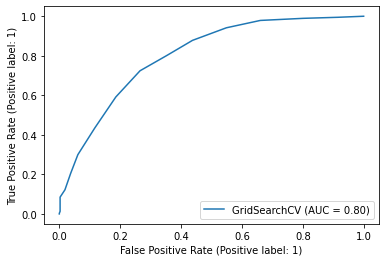

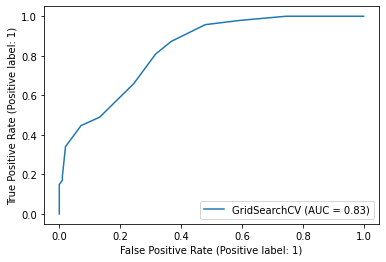

In [ ]:
print(plot_roc_curve(grid_knn, X_smote, y_smote),plot_roc_curve(grid_knn, X_test, y_test))



---



#**MLP (MULTILAYER PERCEPTRON)**



---



In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_smote , y_smote)


train_pred_mlp =  mlp.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_mlp)*100))

print("Confusion Matrix-MLP TRAIN: ")
print(confusion_matrix(y_smote, train_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_mlp))

print("-"*40)

mlp.fit(X_test , y_test)

test_pred_mlp = mlp.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_mlp)*100))

print("Confusion Matrix-MLP TEST: ")
print(confusion_matrix(y_test, test_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_mlp))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Train Accuracy : 85.146% 
Confusion Matrix-MLP TRAIN: 
[[310  67]
 [ 45 332]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       377
           1       0.83      0.88      0.86       377

    accuracy                           0.85       754
   macro avg       0.85      0.85      0.85       754
weighted avg       0.85      0.85      0.85       754

----------------------------------------
Test Accuracy  : 86.207% 
Confusion Matrix-MLP TEST: 
[[93  5]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        98
           1       0.86      0.68      0.76        47

    accuracy                           0.86       145
   macro avg       0.86      0.81      0.83       145
weighted avg       0.86      0.86      0.86       145



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8149153278332611

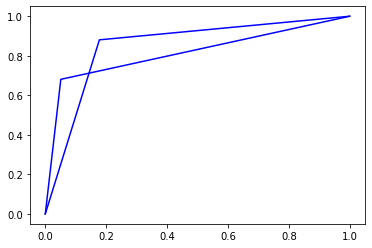

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote,train_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Hiperparametre ile MLP

---





In [ ]:
mlp_gs = MLPClassifier()
parameter_space = {
    'max_iter': [100],   #100-300 aralığı denendi 
    'hidden_layer_sizes': [(10,30,10)], # C = [(10,30,10),(20,)] aralığında denendi
    'activation': ['tanh'], #"tanh" ve "relu" denendi
    'solver': ['adam'],  #"sgd" ve "adam" denendi
    'alpha': [0.25],    #-1-1  aralığı denendi
    'learning_rate': ['adaptive'], #"constant" ve "adaptive" denendi
}
clf_mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=5, cv=5)

#Train Sınıflandırma raporunu yazdırmak
clf_mlp.fit(X_smote,y_smote) 
clf_pre_train = clf_mlp.predict(X_smote)
print(classification_report(y_smote , clf_pre_train))
print("Training Skoru:",accuracy_score(y_smote , clf_pre_train))

#Test Sınıflandırma raporunu yazdırmak
clf_mlp.fit(X_test,y_test)  
clf_pre_test = clf_mlp.predict(X_test)
print(classification_report(y_test , clf_pre_test))
print("Test Skoru:",accuracy_score(y_test , clf_pre_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       377
           1       0.78      0.82      0.80       377

    accuracy                           0.79       754
   macro avg       0.80      0.79      0.79       754
weighted avg       0.80      0.79      0.79       754

Training Skoru: 0.7944297082228117
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.69      0.57      0.63        47

    accuracy                           0.78       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.77      0.78      0.77       145

Test Skoru: 0.7793103448275862


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Hiperparametre ile Grafik

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f5066590> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f4f862d0>


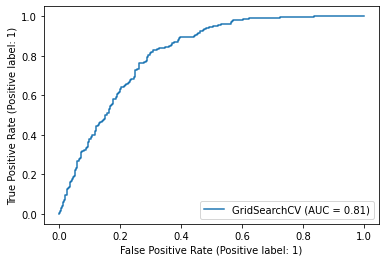

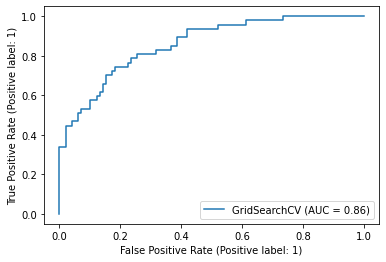

In [ ]:
print(plot_roc_curve(clf_mlp, X_smote, y_smote),plot_roc_curve(clf_mlp, X_test, y_test))



---



#**RANDOM FOREST**



---



In [ ]:
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics


In [ ]:
randomForest = randomForest()
randomForest.fit(X_smote,y_smote)

train_pred_randomForest = randomForest.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_randomForest)*100))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_smote, train_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_randomForest))

print("-"*40)



test_pred_randomForest = randomForest.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_randomForest)*100))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_randomForest))

Train Accuracy : 100.000% 
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 377]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       377

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

----------------------------------------
Test Accuracy  : 76.552% 
Confusion Matrix-randomForest-Test: 
[[79 19]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        98
           1       0.63      0.68      0.65        47

    accuracy                           0.77       145
   macro avg       0.73      0.74      0.74       145
weighted avg       0.77      0.77      0.77       145



0.7434867564046896

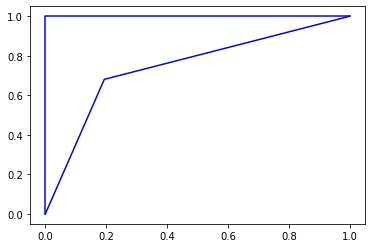

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Random Forest Hiperparametre İle


---




In [ ]:
rf_params = {
            'max_depth': [None], # Depth aralığı None-50 arası denendi. 
            'min_samples_leaf': [1],  # 1-10 aralığı denendi
            'min_samples_split': [2], # 1-10 aralığı denendi  
            'n_estimators': [2000] # 10-2000 aralığı denendi
             }

cv_rf = GridSearchCV(randomForest,rf_params,cv=5,verbose=False,n_jobs=-1)

#Train Sınıflandırma raporunu yazdırmak
cv_rf.fit(X_smote,y_smote) 
cv_rf_pre_train = cv_rf.predict(X_smote)
print(classification_report(y_smote , cv_rf_pre_train))
print("Training Skoru:",accuracy_score(y_smote , cv_rf_pre_train))

#Test Sınıflandırma raporunu yazdırmak
cv_rf.fit(X_test,y_test) 
cv_rf_pre_test = cv_rf.predict(X_test)
print(classification_report(y_test , cv_rf_pre_test))
print("Test Skoru:",accuracy_score(y_test , cv_rf_pre_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       377

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754

Training Skoru: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        47

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Test Skoru: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f630c710> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f53391d0>


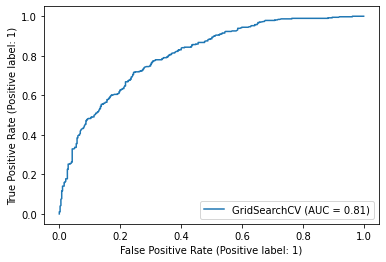

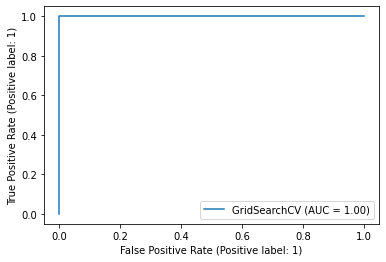

In [ ]:
print(plot_roc_curve(cv_rf, X_smote , y_smote),plot_roc_curve(cv_rf, X_test, y_test))



---



#**GRADIENT BOOSTING**



---



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

In [ ]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_smote, y_smote)

train_pred_gradientBoosting = gradientBoosting.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_smote, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy : 92.838% 
Confusion Matrix-gradientBoosting-Train: 
[[345  32]
 [ 22 355]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       377
           1       0.92      0.94      0.93       377

    accuracy                           0.93       754
   macro avg       0.93      0.93      0.93       754
weighted avg       0.93      0.93      0.93       754

----------------------------------------
Test Accuracy  : 72.414% 
Confusion Matrix-gradientBoosting-Test: 
[[73 25]
 [15 32]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        98
           1       0.56      0.68      0.62        47

    accuracy                           0.72       145
   macro avg       0.70      0.71      0.70       145
weighted avg       0.74      0.72      0.73       145



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting


clf = gradientBoosting()
clf.fit(X_smote,y_smote)
y_score = clf.decision_function(X_smote)

fpr, tpr, _ = roc_curve(y_smote, y_score, pos_label=clf.classes_[1])
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:

clf = gradientBoosting()
clf.fit(X_smote,y_smote)
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])


#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



---
Gradient Boosting Hiperparametre İle


---




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting


param    = {
              "criterion": ["friedman_mse"], # "friedman_mse"ve"squared_error" denendi
              "loss":["exponential","deviance"], # "deviance"ve"exponential","squared_error" denendi
              "max_features":["log2","sqrt"], # "log2" ve "sqrt" denendi
              'learning_rate': [1],   # 0.01-1 aralığı denendi
              'max_depth': [3], # 1-8 aralığı denendi
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10], # [4,5,6] denendi
              'subsample': [0.8], # [0.6,0.7,0.8,0.9,1] denendi
              'n_estimators': [5], # 5-20 aralığı denendi
              
            }
    
model_gboosting = gradientBoosting()
grid_gb  = GridSearchCV(model_gboosting , param , verbose=1)


#Train Sınıflandırma raporunu yazdırmak
grid_gb.fit(X_smote,y_smote) 
grid_gb_pre_train = grid_gb.predict(X_smote)
print(classification_report(y_smote , grid_gb_pre_train))
print("Training Skoru:",accuracy_score(y_smote , grid_gb_pre_train))

#Test Sınıflandırma raporunu yazdırmak
grid_gb.fit(X_test,y_test) 
grid_gb_pre_test = grid_gb.predict(X_test)
print(classification_report(y_test , grid_gb_pre_test))
print("Test Skoru:",accuracy_score(y_test , grid_gb_pre_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       377
           1       0.82      0.83      0.83       377

    accuracy                           0.83       754
   macro avg       0.83      0.83      0.83       754
weighted avg       0.83      0.83      0.83       754

Training Skoru: 0.8262599469496021
Fitting 5 folds for each of 40 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.89      0.83      0.86        47

    accuracy                           0.91       145
   macro avg       0.90      0.89      0.90       145
weighted avg       0.91      0.91      0.91       145

Test Skoru: 0.9103448275862069


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01fec70450> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f534a050>


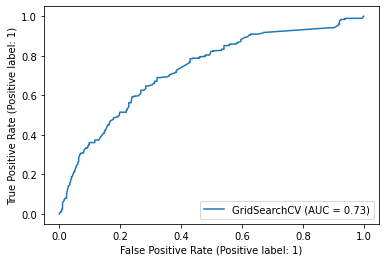

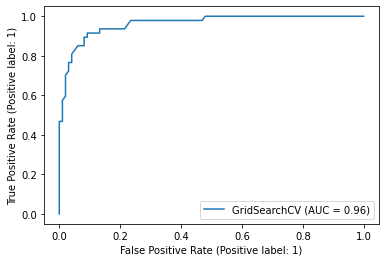

In [ ]:
print(plot_roc_curve(grid_gb, X_smote, y_smote),plot_roc_curve(grid_gb, X_test, y_test))



---



#**XG BOOST**



---



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost


In [ ]:
xgBoost = xgBoost()

xgBoost.fit(X_smote, y_smote)


train_pred_xgBoost = xgBoost.predict(X_smote)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_smote , train_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_smote, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_smote, train_pred_xgBoost))

print("-"*40)

 
xgBoost.fit(X_test,y_test)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy : 89.523% 
Confusion Matrix-xgBoost-Train: 
[[325  52]
 [ 27 350]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       377
           1       0.87      0.93      0.90       377

    accuracy                           0.90       754
   macro avg       0.90      0.90      0.90       754
weighted avg       0.90      0.90      0.90       754

----------------------------------------
Test Accuracy  : 99.310% 
Confusion Matrix-xgBoost-Test: 
[[98  0]
 [ 1 46]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.98      0.99        47

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



0.9893617021276595

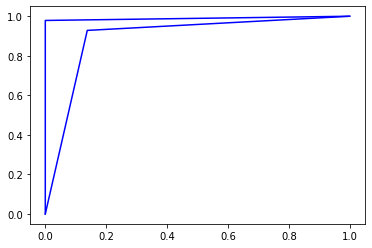

In [ ]:
fpr , tpr , thresolds = metrics.roc_curve(y_smote, train_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
XGBoost Hiperparametreler İle


---




In [ ]:
from xgboost import XGBClassifier
model_xgb   = XGBClassifier(seed=None)
parameters  = {
                "max_depth": [6], #1-100 aralığı denendi
                "n_estimators": [180], # 1-220 aralığı denendi
                "learning_rate": [0.01]  # 0.01-0.05 aralığı denendi
                }

grid_xgb   = GridSearchCV (model_xgb , parameters, verbose=1) 

#Train Sınıflandırma raporunu yazdırmak
grid_xgb.fit(X_smote,y_smote) 
grid_xgb_pre_train = grid_xgb.predict(X_smote)
print(classification_report(y_smote , grid_xgb_pre_train))
print("Training Skoru:",accuracy_score(y_smote , grid_xgb_pre_train))

#Test Sınıflandırma raporunu yazdırmak
grid_xgb.fit(X_test,y_test) 
grid_xgb_pre_test = grid_xgb.predict(X_test)
print(classification_report(y_test , grid_xgb_pre_test))
print("Test Skoru:",accuracy_score(y_test , grid_xgb_pre_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       377
           1       0.88      0.96      0.92       377

    accuracy                           0.92       754
   macro avg       0.92      0.92      0.92       754
weighted avg       0.92      0.92      0.92       754

Training Skoru: 0.916445623342175
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        98
           1       0.94      0.98      0.96        47

    accuracy                           0.97       145
   macro avg       0.96      0.97      0.97       145
weighted avg       0.97      0.97      0.97       145

Test Skoru: 0.9724137931034482


<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01fec75ed0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f01f5618410>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


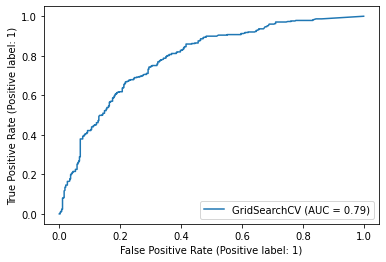

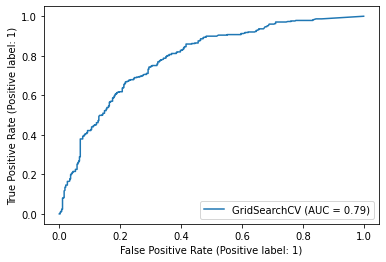

In [ ]:
print(plot_roc_curve(grid_xgb, X_smote, y_smote),plot_roc_curve(grid_xgb,X_smote, y_smote))